   
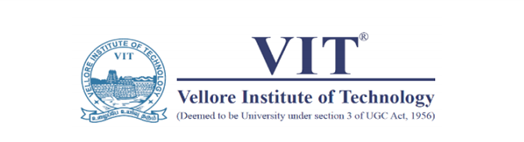

SCHOOL OF COMPUTER SCIENCE ENGINEERING
FALL SEMESTER 2021-2022
                                     
NAME: Valliammai.V <br>
REG NO: 19MID0124 <br>
COURSE CODE: MDI4001 <br>
FACULTY: Dr.ABDUL GAFFAR H<br>  
SUBJECT: Machine Learning for Data Science (ELA)<br> 
ASSIGNMENT NO: 1<br>


#### Questions
Implement logistic regression algorithm and test the algorithm using any data set of your
choice from UCI repository. The output should include Accuracy, Error rate, Precision and
recall rate along with the confusion matrix.

print('Valliammai-19MID0124')

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# description about dataset
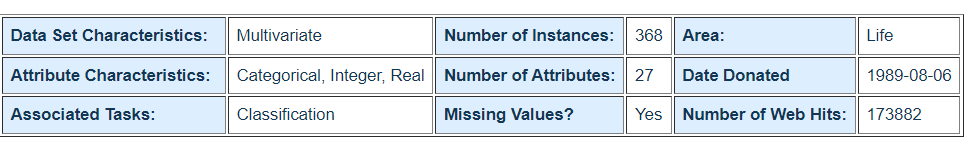

Dataset that has been used is horse dataset
We have to predict whether horse can be treated without  surgery OR not

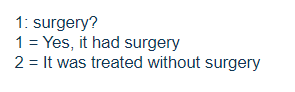

for more info: https://archive.ics.uci.edu/ml/datasets/Horse+Colic

In [2]:
df=pd.read_csv('horse.csv')

In [3]:
df.head()

,surgery,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,Unnamed: 22,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,Unnamed: 27,type_of_lesion1,type_of_lesion2,type_of_lesion3,Unnamed: 31
0,2,1,530101,38.50,66,28,3,3,?,2,...,2,2,11300,0,0,2,NaN,NaN,NaN,NaN
1,1,1,534817,39.2,88,20,?,?,4,1,...,3,2,2208,0,0,2,NaN,NaN,NaN,NaN
2,2,1,530334,38.30,40,24,1,1,3,1,...,1,2,0,0,0,1,NaN,NaN,NaN,NaN
3,1,9,5290409,39.10,164,84,4,1,6,2,...,2,1,2208,0,0,1,NaN,NaN,NaN,NaN
4,2,1,530255,37.30,104,35,?,?,6,2,...,2,2,4300,0,0,2,NaN,NaN,NaN,NaN


In [4]:
df.shape

(300, 32)

In [5]:
df.info

<bound method DataFrame.info of     surgery  Age  Hospital_Number rectal_temperature pulse respiratory_rate  \
0         2    1           530101              38.50    66               28   
1         1    1           534817               39.2    88               20   
2         2    1           530334              38.30    40               24   
3         1    9          5290409              39.10   164               84   
4         2    1           530255              37.30   104               35   
..      ...  ...              ...                ...   ...              ...   
295       1    1           533886                  ?   120               70   
296       2    1           527702              37.20    72               24   
297       1    1           529386              37.50    72               30   
298       1    1           530612              36.50   100               24   
299       1    1           534618               37.2    40               20   

    temperature_of_

In [6]:
df=df.drop(['type_of_lesion1','type_of_lesion2','type_of_lesion3'],axis=1)

In [7]:
df=df.drop(['Unnamed: 27','Unnamed: 31','Unnamed: 17','Unnamed: 15','Unnamed: 22'],axis=1)

In [8]:
df.head()

,surgery,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,nasogastric_reflux,nasogastric_reflux_PH,rectal_examination,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion
0,2,1,530101,38.50,66,28,3,3,?,2,...,?,3,45.00,8.40,?,?,2,11300,0,0
1,1,1,534817,39.2,88,20,?,?,4,1,...,?,4,50,85,2,2,2,2208,0,0
2,2,1,530334,38.30,40,24,1,1,3,1,...,?,1,33.00,6.70,?,?,2,0,0,0
3,1,9,5290409,39.10,164,84,4,1,6,2,...,2,3,48.00,7.20,3,5.30,1,2208,0,0
4,2,1,530255,37.30,104,35,?,?,6,2,...,?,?,74.00,7.40,?,?,2,4300,0,0


In [9]:
df=df.replace('?', np.NaN)

In [10]:
df.isna().sum()

surgery                          1
Age                              0
Hospital_Number                  0
rectal_temperature              60
pulse                           24
respiratory_rate                58
temperature_of_extremities      56
peripheral_pulse                69
mucous_membranes                47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          102
rectal_examination              29
abdomen                         33
packed_cell_volume             165
total_protein                  198
abdominocentesis_appearance      0
abdomcentesis_total_protein      0
outcome                          0
surgical_lesion                  0
dtype: int64

In [11]:
df=df.drop(['nasogastric_tube','nasogastric_reflux','nasogastric_reflux_PH','peripheral_pulse','packed_cell_volume','total_protein'],axis=1)

In [12]:
df.shape

(300, 18)

In [13]:
df.isna().sum()

surgery                         1
Age                             0
Hospital_Number                 0
rectal_temperature             60
pulse                          24
respiratory_rate               58
temperature_of_extremities     56
mucous_membranes               47
capillary_refill_time          32
pain                           55
peristalsis                    44
abdominal_distension           56
rectal_examination             29
abdomen                        33
abdominocentesis_appearance     0
abdomcentesis_total_protein     0
outcome                         0
surgical_lesion                 0
dtype: int64

In [14]:
df.info

<bound method DataFrame.info of     surgery  Age  Hospital_Number rectal_temperature pulse respiratory_rate  \
0         2    1           530101              38.50    66               28   
1         1    1           534817               39.2    88               20   
2         2    1           530334              38.30    40               24   
3         1    9          5290409              39.10   164               84   
4         2    1           530255              37.30   104               35   
..      ...  ...              ...                ...   ...              ...   
295       1    1           533886                NaN   120               70   
296       2    1           527702              37.20    72               24   
297       1    1           529386              37.50    72               30   
298       1    1           530612              36.50   100               24   
299       1    1           534618               37.2    40               20   

    temperature_of_

In [15]:
df['surgery'].unique()

array(['2', '1', nan], dtype=object)

In [16]:
df['surgery']=pd.to_numeric(df['surgery'])

In [17]:
df.describe()

,surgery,Age,Hospital_Number,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion
count,299.000000,300.000000,3.000000e+02,300.000000,300.000000,300.000000,300.000000
mean,1.397993,1.640000,1.085889e+06,1.363333,3657.880000,90.226667,7.363333
std,0.490305,2.173972,1.529801e+06,0.481763,5399.513513,649.569234,127.536674
min,1.000000,1.000000,5.184760e+05,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,5.289040e+05,1.000000,2111.750000,0.000000,0.000000
50%,1.000000,1.000000,5.303055e+05,1.000000,2673.500000,0.000000,0.000000
75%,2.000000,1.000000,5.347275e+05,2.000000,3209.000000,0.000000,0.000000
max,2.000000,9.000000,5.305629e+06,2.000000,41110.000000,7111.000000,2209.000000


In [18]:
df=df.dropna()

In [19]:
df.shape

(124, 18)

In [20]:
X=df.drop(['surgery','Hospital_Number'],axis=1)
y=df['surgery']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lgr=LogisticRegression()

In [24]:
lgr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred=lgr.predict(X_test)

In [26]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[14  0]
 [ 5  6]]


In [27]:
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))
print('Error rate on confusion_matrix: ' ,1-metrics.accuracy_score(y_test, y_pred))
print('sensitivity Score on confusion_matrix: ',metrics.recall_score(y_test, y_pred))
print('precision Score on confusion_matrix: ',metrics.precision_score(y_test, y_pred))
metrics.f1_score(y_test, y_pred)

Accuracy Score on confusion_matrix:  0.8
Error rate on confusion_matrix:  0.19999999999999996
sensitivity Score on confusion_matrix:  1.0
precision Score on confusion_matrix:  0.7368421052631579


0.8484848484848484